# SW1PerS: Sliding Windows and 1-Persistence Scoring - Solutions

### MSRI-UP 2023

Authors: Jose Perea 

Date: 06/15/2023


---


### Activity: 

Write a python function which takes as input a time series $f$, enconded as a list or an array, a time delay $\tau > 0$, an embedding dimension $d \in \mathbb{N}$, a number of points `n_data`, and returns the corresponding sliding window point cloud   

---


<img src="https://i.ibb.co/3R9P6p7/SW.png" alt="test-1" border="0" width=650px>


In [23]:
## Your work here

import numpy as np
from scipy.interpolate import CubicSpline

from matplotlib import pyplot as plt

def cubic_cloud(f, tau, dim, n_data):
    #f is to be viewed as an array of two columns of data
    
    #Section 1: Creating our test inputs for respective sliding windows
    init = []
    len_range = len(f[0])
    cloud_1 = []
    for numb in range(dim+1):
        cloud_1.append([])
    C = (f[0][len_range-1] - dim*tau - f[0][0])/(n_data)
    for par in range(n_data):
        init.append(f[0][0] + (par)*C)
    row=0
    for pt in init:
        for x in range(dim+1):
            cloud_1[x].append(pt + x*tau)
            
    #Section 2: Applying the CubicSpline function to get the output matrix
    cubic = CubicSpline(f[0],f[1])
    cloud_2 = []
    for j in range(dim+1):
        cloud_2.append(cubic(cloud_1[j]))
    
    return np.array([np.array(cloud_1), np.array(cloud_2)])

The sliding window point cloud has shape (2, 5, 5000)


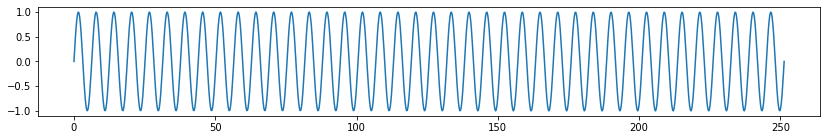

In [24]:
## Test it here

x_vals = np.linspace(0 , 80*np.pi, 1000)
y_vals = np.sin(x_vals) # + 1.1*np.sin(np.sqrt(3)*x_vals)

plt.figure(figsize = (14,2))
plt.plot(x_vals, y_vals);

f = np.array([x_vals, y_vals]) ## <---- toy time series
d = 4
tau = 1.5
n_data = 5000

SW = cubic_cloud(f,tau, d, n_data )
type(SW)

print('The sliding window point cloud has shape', SW.shape)

In [25]:
## Visualize the sliding window point cloud with PCA:

from sklearn.decomposition import PCA
import plotly.graph_objects as go
from plotly.subplots import make_subplots

pca = PCA(n_components=5)
SW_pca = pca.fit(SW).transform(SW)

print('Explained Variance', pca.explained_variance_ratio_)

fig = go.Figure(data=[go.Scatter3d(
    x=SW_pca[:,0], y=SW_pca[:,1], z=SW_pca[:,2], 
    mode ='markers', 
    marker=dict(size = 1.5, color = 'grey')
)] , layout = go.Layout(scene = dict(aspectmode= 'data')))

fig.show()

ValueError: Found array with dim 3. PCA expected <= 2.

In [ ]:
# Compute the persistent homology of the SW point cloud




### Not Periodic VS Periodic VS Quasiperiodic

In [ ]:
x_vals = np.linspace(0 , 80*np.pi, 1000)

y_not_per  = np.random.rand(len(x_vals))
y_per  = np.sin(x_vals)
y_qper  = np.sin(x_vals) + 1.1*np.sin(np.sqrt(3)*x_vals)

plt.figure(figsize = (12,5)) 
plt.subplot(3,1,1)
plt.plot(x_vals, y_not_per)

plt.subplot(3,1,2)
plt.plot(x_vals, y_per)

plt.subplot(3,1,3)
plt.plot(x_vals, y_qper)

In [ ]:
# Slidng window point clouds

d = 4
tau = 1.5
n_data = 5000

f_not_per = np.array([x_vals, y_not_per])
SW_not_per = cubic_cloud(f_not_per, tau, d, n_data )

f_per = np.array([x_vals, y_per])
SW_per = cubic_cloud(f_per, tau, d, n_data )

f_qper = np.array([x_vals, y_qper])
SW_qper = cubic_cloud(f_qper, tau, d, n_data )

In [ ]:
# Persistent homology computations

n_landmarks = 200
prime_coeff = 7

rips_not_per = ripser(SW_not_per, n_perm = n_landmarks, coeff = prime_coeff, maxdim=2)
dgms_not_per = rips_not_per['dgms']

rips_per = ripser(SW_per, n_perm = n_landmarks, coeff = prime_coeff, maxdim=2)
dgms_per = rips_per['dgms']

rips_qper = ripser(SW_qper, n_perm = n_landmarks, coeff = prime_coeff, maxdim=2)
dgms_qper = rips_qper['dgms']


In [ ]:
plt.figure(figsize = (12,3)) 
plt.subplot(1,3,1)
plot_diagrams(dgms_per)
plt.title('$\mathsf{dgm}^\mathcal{R}_{*}(SW_{Per}; \mathbb{Z}_{' + str(prime_coeff) +'})$');
x_left, x_right = plt.xlim()
y_left, y_right = plt.ylim()

plt.subplot(1,3,3)
plot_diagrams(dgms_not_per, xy_range  = [x_left, x_right, y_left, y_right] )
plt.title('$\mathsf{dgm}^\mathcal{R}_{*}(SW_{notPer}; \mathbb{Z}_{' + str(prime_coeff) +'})$');

plt.subplot(1,3,2)
plot_diagrams(dgms_qper, xy_range  = [x_left, x_right, y_left, y_right] )
plt.title('$\mathsf{dgm}^\mathcal{R}_{*}(SW_{qPer}; \mathbb{Z}_{' + str(prime_coeff) +'})$');
plt.show()

### Maximum persistence as periodicity score

$$
mp_1 = \max \big\{ b - a \; : \; (a,b) \in \mathsf{dgm}_1(\mathcal{R}(\mathbb{SW}_{d,\tau} f))\big\}
$$


### Activity

Write a python function which computes $mp_1$. Test it on the periodic, quasiperiodic and not periodic time series above.

In [ ]:
# your work here

def max_pers():
    
    return 

---
### Activity: Choosing $d$ and $\tau$

See Question 1, Homework 1 - Day 4

---

### Activity

1. Import the liver data `hughes2009-liver_res.xlx`. Each row encodes the gene expression profile of a particular gene in the liver of the mouse. 
2. Compute $mp_1$ for each row in the data, with approprimate parameters  $d$, $\tau$ and `n_data`.
3. Rank order the genes from most periodic to least periodic. Do the rankings make sense?

In [ ]:
# Your work here





---

## Video SW1PerS

In [ ]:
## Installs 

!pip install Pillow
!pip install opencv-python

# re-start kernel once you run this cell. Only need to run this once.

In [ ]:
from PIL import Image
import cv2
import glob
from scipy import interpolate

# Auxiliary video functions
def getSlidingWindowVideo(I, dim, Tau, dT):
    N = I.shape[0] #Number of frames
    P = I.shape[1] #Number of pixels (possibly after PCA)
    pix = np.arange(P)
    NWindows = int(np.floor((N-dim*Tau)/dT))
    X = np.zeros((NWindows, dim*P))
    idx = np.arange(N)
    for i in range(NWindows):
        idxx = dT*i + Tau*np.arange(dim)
        start = int(np.floor(idxx[0]))
        end = int(np.ceil(idxx[-1]))
        f = interpolate.interp2d(pix, idx[start:end+1], I[idx[start:end+1], :], kind='linear')
        X[i, :] = f(pix, idxx).flatten()
    return X

def writeVideo(filename, frame_data, fps, resol ):
    n_row, n_col = resol
    out = cv2.VideoWriter(filename, cv2.VideoWriter_fourcc(*'mp4v'), fps, (n_col, n_row))
    if frame_data.dtype !='uint8':
        frame_data -= np.amin(frame_data)
        frame_data *= 255/np.amax(frame_data)
        frame_data = np.uint8(frame_data)
    for frame in frame_data:
        out.write(frame.reshape((n_row, n_col,-1)))
    out.release()

def playVideo(filepath):
    cap = cv2.VideoCapture(filepath)
    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break
        #frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        cv2.imshow('frame', frame)
        if cv2.waitKey(24) == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()  

def loadVideo(filepath):
    vid = cv2.VideoCapture(filepath)
    _, image = vid.read()
    count = 0
    success = True
    n_row, n_col, _ = image.shape
    data = []
    while success:
        data.append(image.flatten()) 
        success,image = vid.read()
        count += 1
    vid.release() 
    data = np.array(data)
    print(count, " frames extracted")
    print("frame size = ", (n_row , n_col))
    print("data shape =", data.shape)
    return data , (n_row, n_col)

In [ ]:
# Play the video

playVideo('data/dots_quasi.wmv')

In [ ]:
data , shape = loadVideo('data/dots_quasi.wmv')
n_row, n_col = shape

In [ ]:
# Construct the sliding window pointcloud of video data
wSize = 16
dim = 5
Tau = wSize/float(dim)

desiredSamples = 600
M = data.shape[0] - wSize + 1
dT = M/float(desiredSamples)

X = getSlidingWindowVideo(data, dim, Tau, dT)

XS = X - np.mean(X, 1)[:, None]
XS = XS/np.sqrt(np.sum(XS**2, 1))[:, None]

X = X - np.amin(X)
X = X/np.amax(X)
X = np.uint8(X*255)
frame_data = X[:, 0:data.shape[1]]

In [ ]:
# PCA of the Sliding window point cloud
pca = PCA(n_components=25)
XS_pca = pca.fit(XS).transform(XS)
plt.figure(figsize = (3.8,1.5))
plt.plot(pca.explained_variance_ratio_, '-*') ;
plt.title('Explained PCA variance -Sliding Window');

In [ ]:
fig = go.Figure(data=[go.Scatter3d(
    x=XS_pca[:,0], y=XS_pca[:,1], z=XS_pca[:,2], 
    mode ='markers', 
#    marker=dict(size = 3, color = np.arange(data.shape[0]) , colorscale='plasma' , opacity = 1)
    marker=dict(size = 3, color = 'grey', opacity = 1)
)])

fig.update_layout( width=900, height=450) 
fig.show()

In [ ]:
# Compute persistence diagrams of the pca vesion of the sliding window point cloud
res = ripser(XS_pca, maxdim=2, n_perm =150, coeff =13, thresh = 0.9)
dgms = res['dgms']
plt.figure(figsize = (3,3)) 
plot_diagrams(dgms)